## Домашнее задание

Попробуйте обучить нейронную сеть LSTM на любом другом датасете (любимый временной ряд, текст на русском (другом языке) как генератор или классификатор, или прилагаемый набор airline-passengers - пасажиропоток для авиалиний). Опишите, какой результата вы получили? Что помогло вам улучшить ее точность?

    
*Попробуйте на numpy реализовать нейронную сеть архитектуры LSTM

*Предложите свои варианты решения проблемы исчезающего градиента в RNN

In [1]:
import numpy
import pandas as pd 
import numpy as np
import tensorflow as tf
from tensorflow import keras
import matplotlib.pyplot as plt
import math
from datetime import datetime

from tensorflow.keras.models import Sequential, Model
from tensorflow.keras.layers import Dense
from tensorflow.keras.layers import Input
from tensorflow.keras.layers import LSTM
from tensorflow.keras.layers import Conv1D, Flatten
from sklearn.preprocessing import MinMaxScaler
from sklearn.metrics import mean_squared_error

from tensorflow.keras.layers import Dense, Activation, Dropout
from tensorflow.keras.layers import LSTM

In [2]:
ap_df = pd.read_csv('airline-passengers.csv')
ap_df.head()

,Month,Passengers
0,1949-01,112
1,1949-02,118
2,1949-03,132
3,1949-04,129
4,1949-05,121


# Подготовка данных

In [3]:
# Быстрый анализ типов данных и наличия пропусков 
ap_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 144 entries, 0 to 143
Data columns (total 2 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   Month       144 non-null    object
 1   Passengers  144 non-null    int64 
dtypes: int64(1), object(1)
memory usage: 2.4+ KB


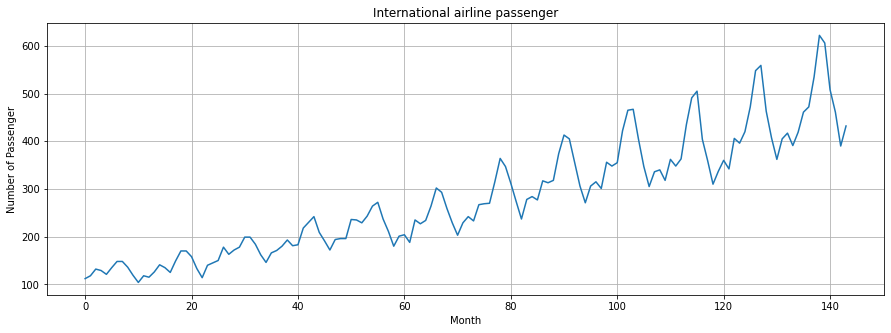

In [4]:
# Визуальный анализ набора 
ap_df = ap_df.iloc[:,1].values
plt.figure(figsize=(15,5))
plt.grid('on')
plt.plot(ap_df)
plt.xlabel("Month")
plt.ylabel("Number of Passenger")
plt.title("International airline passenger")
plt.show()

In [5]:
ap_df = ap_df.reshape(-1,1)
ap_df = ap_df.astype("float32")
ap_df.shape

(144, 1)

In [6]:
scaler = MinMaxScaler(feature_range=(0, 1))
ap_df_sc = scaler.fit_transform(ap_df)

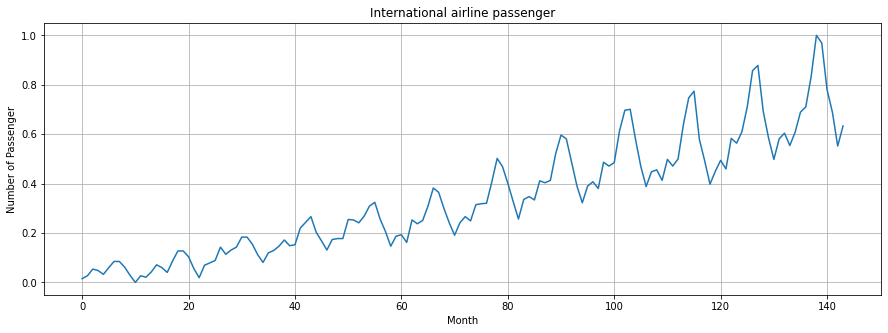

In [7]:
# Визуальный анализ набора после масштбирования 
plt.figure(figsize=(15,5))
plt.grid('on')
plt.plot(ap_df_sc)
plt.xlabel("Month")
plt.ylabel("Number of Passenger")
plt.title("International airline passenger")
plt.show()
plt.show()

In [8]:
df = ap_df
df_scaled = ap_df_sc

In [9]:
train_size = int(len(df) * 0.60)
test_size = len(df) - train_size
train = df_scaled[0:train_size,:]
test = df_scaled[train_size:len(df),:]
print("train size: {}, test size: {} ".format(len(train), len(test)))

train size: 86, test size: 58 


In [10]:
timestemp = 10
X_data = []
y_data = []
for i in range(len(train)-timestemp-1):
    a = train[i:(i+timestemp), 0]
    X_data.append(a)
    y_data.append(train[i + timestemp, 0])
X_train = np.array(X_data)
y_train = np.array(y_data) 

In [11]:
X_data = []
y_data = []
for i in range(len(test)-timestemp-1):
    a = test[i:(i+timestemp), 0]
    X_data.append(a)
    y_data.append(test[i + timestemp, 0])
X_test = np.array(X_data)
y_test = np.array(y_data) 

In [12]:
X_train = np.reshape(X_train, (X_train.shape[0], X_train.shape[1], 1))
X_test = np.reshape(X_test, (X_test.shape[0], X_test.shape[1], 1))
print('shape of X_train: ', X_train.shape)
print('shape of X_test: ', X_test.shape)

shape of X_train:  (75, 10, 1)
shape of X_test:  (47, 10, 1)


# LSTM

In [13]:
scaler = MinMaxScaler(feature_range=(0,1))
df = scaler.fit_transform(df)

In [14]:
train_size = int(len(df)*0.50)
test_size = len(df) - train_size
train = df[0:train_size,:]
test = df[train_size:len(df),:]
print('train_size : {}, test_size : {}'.format(len(train),len(test)))

train_size : 72, test_size : 72


In [15]:
timestemp = 10
X_data = []
y_data = []
for i in range(len(train)-timestemp-1):
    a = train[i:(i+timestemp), 0]
    X_data.append(a)
    y_data.append(train[i + timestemp, 0])
X_train = np.array(X_data)
y_train = np.array(y_data) 

In [16]:
X_data = []
y_data = []
for i in range(len(test)-timestemp-1):
    a = test[i:(i+timestemp), 0]
    X_data.append(a)
    y_data.append(test[i + timestemp, 0])
X_test = np.array(X_data)
y_test = np.array(y_data) 

In [17]:
X_train = np.reshape(X_train, (X_train.shape[0], 1, X_train.shape[1]))
X_test = np.reshape(X_test, (X_test.shape[0], 1, X_test.shape[1], 1))

print('shape of X_train: ', X_train.shape)
print('shape of X_test: ', X_test.shape)

shape of X_train:  (61, 1, 10)
shape of X_test:  (61, 1, 10, 1)


In [18]:
# Входные данные модели 
model_input = Input(shape=(1, timestemp))

# БЛОК 1: Рекурентные слои 
# Слой #1
x = LSTM(10,activation='relu')(model_input)
x = Dropout(0.25)(x)

# БЛОК 2: Полносвязанный слой 
x = Dense(1)(x)

# Создание модели 
model_lstm = Model(model_input, x, name='rnn_2')

# Компиляция модели
model_lstm.compile(loss='mse', 
                optimizer='adam', 
                metrics=['mae'])


model_lstm.summary()

Model: "rnn_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_1 (InputLayer)        [(None, 1, 10)]           0         
                                                                 
 lstm (LSTM)                 (None, 10)                840       
                                                                 
 dropout (Dropout)           (None, 10)                0         
                                                                 
 dense (Dense)               (None, 1)                 11        
                                                                 
Total params: 851
Trainable params: 851
Non-trainable params: 0
_________________________________________________________________


In [19]:
history_ = model_lstm.fit(X_train, y_train, 
                        batch_size=1,
                        epochs=155, 
                        verbose=2,
                        validation_data=(X_train, y_train))

Epoch 1/155
61/61 - 1s - loss: 0.0250 - mae: 0.1322 - val_loss: 0.0134 - val_mae: 0.0931 - 1s/epoch - 20ms/step
Epoch 2/155
61/61 - 0s - loss: 0.0093 - mae: 0.0746 - val_loss: 0.0059 - val_mae: 0.0585 - 147ms/epoch - 2ms/step
Epoch 3/155
61/61 - 0s - loss: 0.0060 - mae: 0.0600 - val_loss: 0.0046 - val_mae: 0.0532 - 146ms/epoch - 2ms/step
Epoch 4/155
61/61 - 0s - loss: 0.0048 - mae: 0.0531 - val_loss: 0.0046 - val_mae: 0.0527 - 145ms/epoch - 2ms/step
Epoch 5/155
61/61 - 0s - loss: 0.0054 - mae: 0.0598 - val_loss: 0.0043 - val_mae: 0.0524 - 152ms/epoch - 2ms/step
Epoch 6/155
61/61 - 0s - loss: 0.0064 - mae: 0.0591 - val_loss: 0.0044 - val_mae: 0.0519 - 150ms/epoch - 2ms/step
Epoch 7/155
61/61 - 0s - loss: 0.0046 - mae: 0.0525 - val_loss: 0.0043 - val_mae: 0.0518 - 157ms/epoch - 3ms/step
Epoch 8/155
61/61 - 0s - loss: 0.0051 - mae: 0.0581 - val_loss: 0.0042 - val_mae: 0.0519 - 149ms/epoch - 2ms/step
Epoch 9/155
61/61 - 0s - loss: 0.0061 - mae: 0.0606 - val_loss: 0.0041 - val_mae: 0.0517 -

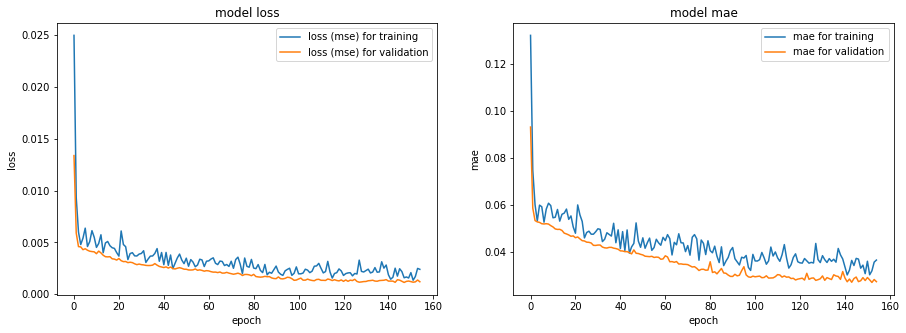

In [20]:
fig, (axL, axR) = plt.subplots(ncols=2, figsize=(15, 5))
axL.plot(history_.history['loss'], label="loss (mse) for training")
axL.plot(history_.history['val_loss'], label="loss (mse) for validation")
axL.set_title('model loss')
axL.set_xlabel('epoch')
axL.set_ylabel('loss')
axL.legend(loc='upper right')

axR.plot(history_.history['mae'], label="mae for training")
axR.plot(history_.history['val_mae'], label="mae for validation")
axR.set_title('model mae')
axR.set_xlabel('epoch')
axR.set_ylabel('mae')
axR.legend(loc='upper right')

plt.show()

In [21]:
trainPredict = model_lstm.predict(X_train)
testPredict = model_lstm.predict(X_test)

trainPredict = scaler.inverse_transform(trainPredict)
y_train = scaler.inverse_transform([y_train])
testPredict = scaler.inverse_transform(testPredict)
y_test = scaler.inverse_transform([y_test])

trainScore = math.sqrt(mean_squared_error(y_train[0], trainPredict[:,0]))
print('Train Score: %.2f RMSE' % (trainScore))
testScore = math.sqrt(mean_squared_error(y_test[0], testPredict[:,0]))
print('Test Score: %.2f RMSE' % (testScore))

Train Score: 18.00 RMSE
Test Score: 49.73 RMSE


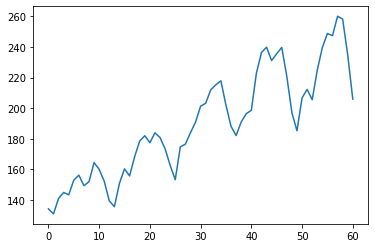

In [22]:
plt.plot(trainPredict)

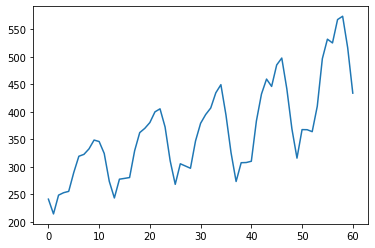

In [23]:
plt.plot(testPredict)

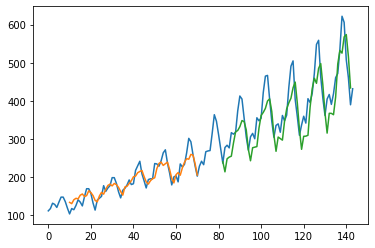

In [24]:
trainPredictPlot = np.empty_like(df)
trainPredictPlot[:, :] = np.nan
trainPredictPlot[timestemp:len(trainPredict)+timestemp, :] = trainPredict

testPredictPlot = np.empty_like(df)
testPredictPlot[:, :] = np.nan
testPredictPlot[len(trainPredict)+(timestemp*2)+1:len(df)-1, :] = testPredict

plt.plot(scaler.inverse_transform(df))
plt.plot(trainPredictPlot)
plt.plot(testPredictPlot)
plt.show()

__Увеличение ширины слоя приводит к повышению точности на тесте, но мне кажется, что здесь присутствует сильное переобучение, так как исходные данные и прогноз довольно сильно совпадают.__